<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Linear Regression**


## **Linear Regression Basics**

**Regression** is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out **cause and effect relationship between variables**. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables. Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data.

**Linear Regression** with multiple variables is also known as **“multivariate linear regression”**. The multivariable form of the hypothesis function accommodating these multiple features is as follows:


$$
\begin{align*}&\mathrm{Hypothesis}: h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + \cdot\cdot\cdot + \theta_{n}x_{n} \\&\mathrm{Cost \ Function}: J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 \\&\mathrm{Goal}: \min_{\theta}J(\theta) \\\end{align*}
$$

## **Gradient Descent for Linear Regression**

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. We do this is by taking the **derivative** (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter **$\alpha$**, which is called the **learning rate**. The **gradient descent algorithm** can be represented as:

$$\begin{align*}  
&\frac{\partial J(\theta)}{\partial \theta_{0}}= \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)}) \\
&\frac{\partial J(\theta)}{\partial \theta_{j}}= \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)} \\
\end{align*}
$$

$$
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\cdot\cdot\cdot \\
\theta_{n}
\end{bmatrix}
= 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\cdot\cdot\cdot \\
\theta_{n}
\end{bmatrix} 
-
\alpha
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_{0}} \\
\frac{\partial J(\theta)}{\partial \theta_{1}} \\
\cdot\cdot\cdot \\
\frac{\partial J(\theta)}{\partial \theta_{n}}
\end{bmatrix}
$$

$$\begin{align*}  
&repect\ until \ convergence\{ \\
&\ \ \ \ \theta_{j} :=\theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}) \ \ \ \ for \ j := 0 \cdot\cdot\cdot n \\
&\} \\
\end{align*}
$$

We should adjust our parameter $\alpha$ to ensure that the gradient descent algorithm converges in a reasonable time. **If $\alpha$ is too small**, gradient descent can be slow. **If $\alpha$ is too large**, gradient descent can overshoot the minimum. It may fail to converge, or even diverge. Failure to converge or too much time to obtain the minimum value imply that our step size is wrong.

## **Evaluation Metrics for Linear Regression**

We can use **Mean squared error(MSE)** and **Root mean squared error(RMSE)** to evaluate our model. The Mean Squared Error (MSE) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. MSE is defined by:



$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2$$

RMSE is the square root of the average of the sum of the squares of residuals. RMSE is defined by:


$$ RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2}$$

## **Dataset Initialization**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(10)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

Text(0, 0.5, 'Y')

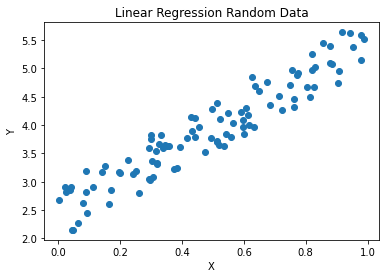

In [4]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title('Linear Regression Random Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')

## **Implementing Linear Regression from scratch**



In [5]:
class LinearRegressionUsingGD:
    def __init__(self, learning_rate=0.05, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def MSE(self, x, y):
        return np.square(np.subtract(x,y)).mean()
    
    def fit(self, x, y):
        self.iters, self.losses = [], []
        self.m = x.shape[0]
        self.theta = np.zeros((x.shape[1]+1,1))
        self.new_x = np.concatenate((np.ones((100,1)),x), axis=1)

        for i in range(self.n_iterations):
            y_pred = np.dot(self.new_x, self.theta) # h_{\theta}(x)
            residuals = y_pred - y # (h_{\theta}(x) - y)
            gradient_vector = np.dot(self.new_x.T, residuals) # x^{T}.(h_{\theta}(x) - y)
            self.theta -= (self.learning_rate / self.m) * gradient_vector
            loss = np.sum((residuals ** 2)) / (2 * self.m) # cost function (1/2m).sum(h_{\theta}(x) - y)^2)
            self.iters.append(i)
            self.losses.append(loss)

        self.plot_curve()
        print("Final MSE: {}".format(self.MSE(self.predict(x),y)))
        print("Slope:", self.theta[1:])
        print("Intercept:", self.theta[:1])
    
    def predict(self, x):
        return np.dot(self.new_x, self.theta)
    
    def plot_curve(self):
        plt.title("Training Curve")
        plt.plot(self.iters, self.losses, label="Train")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

        print("Final Training Loss: {}".format(self.losses[-1]))

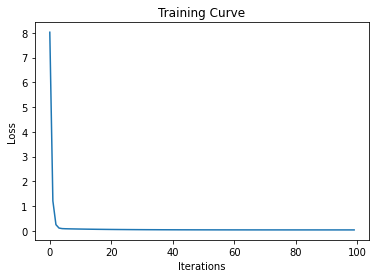

Final Training Loss: 0.03743135871093361
Final MSE: 0.0748452010424157
Slope: [[2.8674393]]
Intercept: [[2.52497525]]


In [6]:
# Model initialization
Linear_Regression_GD = LinearRegressionUsingGD(learning_rate=0.5, n_iterations=100)
# Fit the data(train the model)
Linear_Regression_GD.fit(x, y)
# Predict
y_pred = Linear_Regression_GD.predict(x)

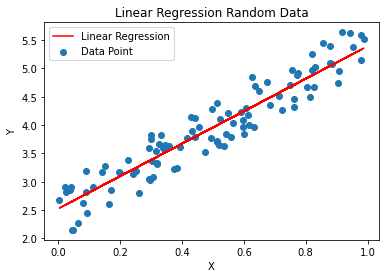

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='Data Point')
plt.plot(x, y_pred, color='red', label='Linear Regression')
ax.set_title('Linear Regression Random Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()

## **Implementing Linear Regression from Scikit-learn**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
mse = mean_squared_error(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Mean squared error: ', mse)

Slope: [[2.92754349]]
Intercept: [2.49392672]
Mean squared error:  0.07456852793404223


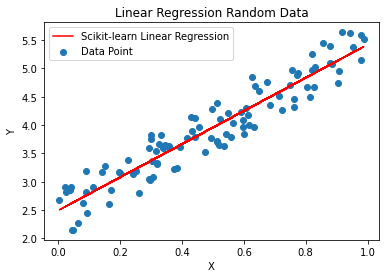

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='Data Point')
plt.plot(x, y_predicted, color='red', label='Scikit-learn Linear Regression')
ax.set_title('Linear Regression Random Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()

In [11]:
%%shell
jupyter nbconvert --to html ML_Algorithms_Linear_Regression.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_Linear_Regression.ipynb to html
[NbConvertApp] Writing 363742 bytes to ML_Algorithms_Linear_Regression.html
